TWITTER SENITMENT ANALYSIS

In [3]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [4]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from dotenv import load_dotenv
import requests
import json

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henrywilcox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load .env environment variables
load_dotenv()

True

In [6]:
# Authentication
consumerKey = os.getenv("TWITTER_API_KEY")
consumerSecret = os.getenv("TWITTER_SECRET_KEY")
accessToken = os.getenv("TWITTER_ACCESS_TOKEN")
accessTokenSecret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [43]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  gas prices
Please enter how many tweets to analyze:  50


In [44]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  50
positive number:  21
negative number:  15
neutral number:  14


In [45]:
tweet_list

,0
0,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...
1,RT @GOP: Americans are paying the highest gas ...
2,RT @BrianMteleSUR: Back to the stone age. Braz...
3,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...
4,RT @SuzieQ02142575: Closed down Keystone Pipli...
5,RT @AlexEpstein: The #1 lesson of skyrocketing...
6,Gas prices have jumped across the US as oil pr...
7,RT @banter44: @kaitlancollins @JonathanLanday ...
8,"@angelacrazygirl @GOP Of course not, can’t bla..."
9,RT @RogTallbloke: Benny Peiser from the GWPF t...


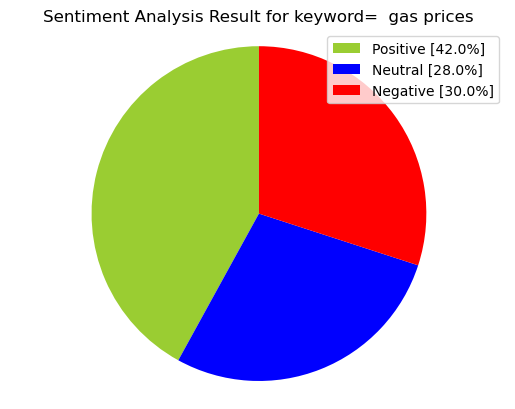

In [46]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [47]:
tweet_list.drop_duplicates(inplace = True)

EXTRACTING TEXT VALUES

text_all = tweet_list[0].values text_neutral = neutral_list[0].values text_positive = positive_list[0].values text_negative = negative_list[0].values

In [48]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...
1,RT @GOP: Americans are paying the highest gas ...,RT @GOP: Americans are paying the highest gas ...
2,RT @BrianMteleSUR: Back to the stone age. Braz...,RT @BrianMteleSUR: Back to the stone age. Braz...
3,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...
4,RT @SuzieQ02142575: Closed down Keystone Pipli...,RT @SuzieQ02142575: Closed down Keystone Pipli...
5,RT @AlexEpstein: The #1 lesson of skyrocketing...,RT @AlexEpstein: The #1 lesson of skyrocketing...
6,Gas prices have jumped across the US as oil pr...,Gas prices have jumped across the US as oil pr...
7,RT @banter44: @kaitlancollins @JonathanLanday ...,RT @banter44: @kaitlancollins @JonathanLanday ...
8,"@angelacrazygirl @GOP Of course not, can’t bla...","@angelacrazygirl @GOP Of course not, can’t bla..."
9,RT @RogTallbloke: Benny Peiser from the GWPF t...,RT @RogTallbloke: Benny Peiser from the GWPF t...


In [49]:
tweet_list

,0,text
0,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...
1,RT @GOP: Americans are paying the highest gas ...,RT @GOP: Americans are paying the highest gas ...
2,RT @BrianMteleSUR: Back to the stone age. Braz...,RT @BrianMteleSUR: Back to the stone age. Braz...
3,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...
4,RT @SuzieQ02142575: Closed down Keystone Pipli...,RT @SuzieQ02142575: Closed down Keystone Pipli...
5,RT @AlexEpstein: The #1 lesson of skyrocketing...,RT @AlexEpstein: The #1 lesson of skyrocketing...
6,Gas prices have jumped across the US as oil pr...,Gas prices have jumped across the US as oil pr...
7,RT @banter44: @kaitlancollins @JonathanLanday ...,RT @banter44: @kaitlancollins @JonathanLanday ...
8,"@angelacrazygirl @GOP Of course not, can’t bla...","@angelacrazygirl @GOP Of course not, can’t bla..."
9,RT @RogTallbloke: Benny Peiser from the GWPF t...,RT @RogTallbloke: Benny Peiser from the GWPF t...


In [50]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...,hi i know you probably thought being secy ...
1,RT @GOP: Americans are paying the highest gas ...,americans are paying the highest gas prices i...
2,RT @BrianMteleSUR: Back to the stone age. Braz...,back to the stone age brazil is self suffici...
3,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...,new gas prices are soaring in france an...
4,RT @SuzieQ02142575: Closed down Keystone Pipli...,closed down keystone pipline gas prices keep...
5,RT @AlexEpstein: The #1 lesson of skyrocketing...,the 1 lesson of skyrocketing gas and coal pr...
6,Gas prices have jumped across the US as oil pr...,gas prices have jumped across the us as oil pr...
7,RT @banter44: @kaitlancollins @JonathanLanday ...,gas prices are not skyrocketing stop usi...
8,"@angelacrazygirl @GOP Of course not, can’t bla...",of course not can t blame biden when ever...
9,RT @RogTallbloke: Benny Peiser from the GWPF t...,benny peiser from the gwpf tells it like it i...


In [51]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...,hi i know you probably thought being secy ...,0.250000,1.000000,positive,0.00,0.890,0.110,0.2732
1,RT @GOP: Americans are paying the highest gas ...,americans are paying the highest gas prices i...,0.200000,0.200000,positive,0.00,0.805,0.195,0.4404
2,RT @BrianMteleSUR: Back to the stone age. Braz...,back to the stone age brazil is self suffici...,0.050000,0.200000,positive,0.00,0.916,0.084,0.1901
3,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...,new gas prices are soaring in france an...,0.136364,0.454545,neutral,0.00,1.000,0.000,0.0000
4,RT @SuzieQ02142575: Closed down Keystone Pipli...,closed down keystone pipline gas prices keep...,-0.127778,0.194444,neutral,0.00,1.000,0.000,0.0000
5,RT @AlexEpstein: The #1 lesson of skyrocketing...,the 1 lesson of skyrocketing gas and coal pr...,0.100000,0.400000,negative,0.14,0.860,0.000,-0.3818
6,Gas prices have jumped across the US as oil pr...,gas prices have jumped across the us as oil pr...,0.080000,0.770000,positive,0.00,0.945,0.055,0.0258
7,RT @banter44: @kaitlancollins @JonathanLanday ...,gas prices are not skyrocketing stop usi...,0.600000,0.900000,positive,0.00,0.629,0.371,0.7259
8,"@angelacrazygirl @GOP Of course not, can’t bla...",of course not can t blame biden when ever...,0.000000,0.000000,positive,0.00,0.893,0.107,0.2584
9,RT @RogTallbloke: Benny Peiser from the GWPF t...,benny peiser from the gwpf tells it like it i...,0.000000,0.100000,positive,0.00,0.848,0.152,0.3612


In [52]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [53]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [54]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,17,40.48
negative,16,38.10
neutral,9,21.43


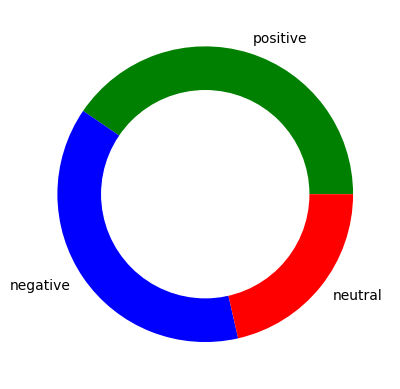

In [55]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [56]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [57]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'

In [58]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'

In [59]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'

In [60]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'

In [61]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [62]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,101.00
neutral,97.67
positive,98.12


In [63]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.88
neutral,17.67
positive,18.06


In [64]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [65]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [66]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [67]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [68]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [69]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @MonicaCrowley: Hi @SecretaryPete\n\nI know...,hi i know you probably thought being secy ...,0.250000,1.000000,positive,0.0,0.890,0.110,0.2732,109,20,hi i know you probably thought being secy ...,"[, hi, i, know, you, probably, thought, being,...","[, hi, know, probably, thought, secy, transpor...","[, hi, know, probabl, thought, seci, transport..."
1,RT @GOP: Americans are paying the highest gas ...,americans are paying the highest gas prices i...,0.200000,0.200000,positive,0.0,0.805,0.195,0.4404,74,13,americans are paying the highest gas prices i...,"[, americans, are, paying, the, highest, gas, ...","[, americans, paying, highest, gas, prices, ye...","[, american, pay, highest, ga, price, year, th..."
2,RT @BrianMteleSUR: Back to the stone age. Braz...,back to the stone age brazil is self suffici...,0.050000,0.200000,positive,0.0,0.916,0.084,0.1901,122,21,back to the stone age brazil is self suffici...,"[, back, to, the, stone, age, brazil, is, self...","[, back, stone, age, brazil, self, sufficient,...","[, back, stone, age, brazil, self, suffici, na..."
3,RT @PoliticsForAlI: 🚨 | NEW: Gas prices are so...,new gas prices are soaring in france an...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,99,18,new gas prices are soaring in france an...,"[, new, gas, prices, are, soaring, in, france,...","[, new, gas, prices, soaring, france, price, d...","[, new, ga, price, soar, franc, price, diesel,..."
4,RT @SuzieQ02142575: Closed down Keystone Pipli...,closed down keystone pipline gas prices keep...,-0.127778,0.194444,neutral,0.0,1.000,0.000,0.0000,121,23,closed down keystone pipline gas prices keep...,"[, closed, down, keystone, pipline, gas, price...","[, closed, keystone, pipline, gas, prices, kee...","[, close, keyston, piplin, ga, price, keep, cl..."


In [70]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

42 Number of reviews has 281 words


In [71]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abus,across,adjust,administrati,age,ago,alli,alreadi,american,...,work,world,would,wrong,ye,yea,year,yet,york,yr
0,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
price,39
ga,34
energi,8
biden,6
oil,5
american,4
go,4
high,4
skyrocket,3
higher,3


In [73]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [74]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('gas prices', 27),
 ('joe biden', 3),
 ('natural gas', 2),
 ('prices soaring', 2),
 ('skyrocketing gas', 2),
 ('gas coal', 2),
 ('coal prices', 2),
 ('prices higher', 2),
 ('energy independent', 2),
 ('prices going', 2),
 ('new york', 2),
 ('hi know', 1),
 ('know probably', 1),
 ('probably thought', 1),
 ('thought secy', 1),
 ('secy transportation', 1),
 ('transportation pretty', 1),
 ('pretty sleepy', 1),
 ('sleepy gig', 1),
 ('gig ve', 1)]

In [75]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('gas prices higher', 2),
 ('hi know probably', 1),
 ('know probably thought', 1),
 ('probably thought secy', 1),
 ('thought secy transportation', 1),
 ('secy transportation pretty', 1),
 ('transportation pretty sleepy', 1),
 ('pretty sleepy gig', 1),
 ('sleepy gig ve', 1),
 ('gig ve got', 1),
 ('americans paying highest', 1),
 ('paying highest gas', 1),
 ('highest gas prices', 1),
 ('gas prices years', 1),
 ('prices years thanks', 1),
 ('years thanks joe', 1),
 ('thanks joe biden', 1),
 ('stone age brazil', 1),
 ('age brazil self', 1),
 ('brazil self sufficient', 1)]